In [1]:
import numpy as np 

In [2]:
#1. Reductions
import numpy as np 
a = np.arange(12).reshape((3,4))
print('a= \n', a)
print("Total mean: ",a.mean())
print("mean along the columns:", a.mean(axis=0))
print("mean along the rows:", a.mean(axis=1))

a= 
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Total mean:  5.5
mean along the columns: [4. 5. 6. 7.]
mean along the rows: [1.5 5.5 9.5]


In [3]:
#2. Outer product
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])

#a) Numpay Outer
print("u:", u)
print("v:", v)
o=np.outer(u,v)
print("Numpay Outer: \n", o, '\n')

#b) Nested loop Outer
result = np.array([u[i]*v[j] for i in range(len(u)) for j in range(len(v))]).reshape(4,4)
print('Nested loop Outer1: \n', result, '\n')

n = np.ones((4,4))
for i in range(4):
    for j in range(4):
        n[i,j] = u[i] * v[j]
print("Nested loop Outer2: \n", n, '\n')

#c) Broadcasting Outer
u = u.reshape(4,1)
#print(u)
b = u*v
print("Broadcasting Outer: \n", b, '\n')



u: [1 3 5 7]
v: [2 4 6 8]
Numpay Outer: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

Nested loop Outer1: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

Nested loop Outer2: 
 [[ 2.  4.  6.  8.]
 [ 6. 12. 18. 24.]
 [10. 20. 30. 40.]
 [14. 28. 42. 56.]] 

Broadcasting Outer: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 



In [11]:
#3. Matrix masking

#Sulotion 1: using mask
a = np.random.uniform(0,3,(10,6)) 
print("a: \n", a, '\n')
mask = (a<0.3)
print("the mask:", mask, '\n')

filtered_a = a[mask]
a[mask] = 0  # It is equal to a[a<0.3]=0
print('filtered_a = \n', filtered_a, '\n')
print('result_a = \n', a, '\n')

#solution2: using function
def masked_array(data, threshold):
    return (data >= threshold).astype(int)
a = np.random.uniform(0,3,(10,6)) 
print("a: \n", a, '\n')
mask = masked_array(a, 0.3)
print("the mask: \n", mask, '\n')
filtered_a = a*mask
print("the filtered: \n", filtered_a, '\n')

a: 
 [[0.18327799 2.51290096 0.78042203 0.14064449 2.74015195 0.11152773]
 [2.00261647 2.06591269 1.92254879 2.66775323 2.10048704 0.23349705]
 [2.96645989 2.63482419 1.67337063 1.20609251 1.36594084 2.45670265]
 [0.06459705 1.49728235 0.93519672 0.49911779 0.05779264 1.71131037]
 [0.62463007 2.95945392 2.94969504 1.47770389 0.34162404 0.9748005 ]
 [1.47505582 1.75205401 1.74162777 1.60184743 0.50969868 0.36402234]
 [2.40398704 1.03514952 1.74905328 1.17031345 2.40416449 0.17852221]
 [1.82795464 0.12148008 2.42212828 1.0654836  2.91887097 2.16158445]
 [2.76255109 2.19907241 0.8504687  0.09416788 2.11556375 1.9853041 ]
 [0.26122857 1.0295304  0.11422162 0.11467688 2.59060485 2.86975417]] 

the mask: [[ True False False  True False  True]
 [False False False False False  True]
 [False False False False False False]
 [ True False False False  True False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False  True]
 [False  True False

x= 
 [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.6

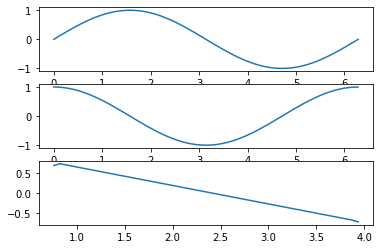

In [15]:
import math
# 4. Trigonometric functions
#create an array of 100 numbers...
pi = math.pi
x = np.linspace(0,2*pi, 100)
print('x= \n', x , '\n')

#Extract every 10th element using the slice notation
b_slice=x[::10]
print('b_slice= \n', b_slice, '\n')

#Reverse the array using the slice notation
x_reverse=x[::-1]
print('x_reverse= \n', x_reverse, '\n')

#Extract elements where the absolute difference between the sin and cos...
s= np.sin(x)
c= np.cos(x)
diff=[]
absDiff = np.abs(s-c) #absDiff[absDiff < 0.1]=0
diff=np.array([x[i] for i in range(len(x)) if absDiff[i] < 0.1])
print('diff= \n', diff, '\n')

#make a plot showing the sin and cos functions and indicate where they are close
import matplotlib.pyplot as plt

plt.subplot(311)
plt.plot(x,s) 

plt.subplot(312)
plt.plot(x,c)

plt.subplot(313)
plt.plot(diff, np.sin(diff))
    

In [6]:
#5. Matrices

#Create a matrix that shows the 10 by 10 multiplication table.
mt= np.fromfunction(lambda i,j: i*j,(11,11))[1:,1:].astype(int)
print('multiplication table= \n', mt,'\n') 

#Find the trace of the matrix
mt_trace = mt.trace()
print('trace of the matrix=', mt_trace,'\n') 

#Extract the anti-diagonal matrix (this should be array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10]))
a= np.fliplr(mt).diagonal()
print('anti-diagonal=', a,'\n') 

#Extract the diagonal offset by 1 upwards (this should be array([ 2, 6, 12, 20, 30, 42, 56, 72, 90]))
b=mt[1:].diagonal()
print('diagonal offset by 1 upwards=',b)


multiplication table= 
 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]] 

trace of the matrix= 385 

anti-diagonal= [10 18 24 28 30 30 28 24 18 10] 

diagonal offset by 1 upwards= [ 2  6 12 20 30 42 56 72 90]


In [7]:
#6. Broadcasting
#Build a 2D grid of distances among each city along Route 66
v= np.array([0,198,303,136,871,1175,1475,1544,1913,2448]).reshape(1,10)
u= v.T

print('v= \n', v, '\n')
print('u= \n', u, '\n')
dis= np.abs(v-u)
print('2D grid of distances= \n', dis, '\n')
            
#Convert the distances in km
k = np.tile(np.array([0.62137]), (1,10))
print('distances in km= \n', dis/k, '\n')


v= 
 [[   0  198  303  136  871 1175 1475 1544 1913 2448]] 

u= 
 [[   0]
 [ 198]
 [ 303]
 [ 136]
 [ 871]
 [1175]
 [1475]
 [1544]
 [1913]
 [2448]] 

2D grid of distances= 
 [[    0   198   303   136   871  1175  1475  1544  1913  2448]
 [ -198     0   105   -62   673   977  1277  1346  1715  2250]
 [ -303  -105     0  -167   568   872  1172  1241  1610  2145]
 [ -136    62   167     0   735  1039  1339  1408  1777  2312]
 [ -871  -673  -568  -735     0   304   604   673  1042  1577]
 [-1175  -977  -872 -1039  -304     0   300   369   738  1273]
 [-1475 -1277 -1172 -1339  -604  -300     0    69   438   973]
 [-1544 -1346 -1241 -1408  -673  -369   -69     0   369   904]
 [-1913 -1715 -1610 -1777 -1042  -738  -438  -369     0   535]
 [-2448 -2250 -2145 -2312 -1577 -1273  -973  -904  -535     0]] 

distances in km= 
 [[    0.           318.6507234    487.63216763   218.87120395
   1401.74131355  1890.98282827  2373.78695463  2484.8319037
   3078.68097913  3939.68167115]
 [ -318.6507234    

In [14]:
#7. Prime numbers sieve
from time import time

#solution with a sieve (mask)
N= 100
p=[]
for i in range(N):
    p.append(True)
p[0]= False
p[1]= False
a=2
start = time()
while a<N:
    if p[a]==True:
        for i in range(a**2,N,a):
            p[i] = False
    a+=1
print ('Time of prime with masking in seconds: ' , str(time() - start))

print("The mask is: \n", p)
print("The prime numbers are: \n")
for i in range(len(p)):
    if p[i] == True:
        print(i)

#solution without masking
a= np.arange(0,99)

def isPrime(m):
    for i in range(len(p)):
        if m % p[i] == 0:
            return False
    return True

p = [2]
m=2
N= 99
prime =[]
start = time()
while(m<=N):
    if isPrime(m):
        p.append(m)
    m+=1
print(p)
print ('Time of prime without masking in seconds: ' , str(time() - start))



Time of prime with masking in seconds:  0.00017976760864257812
The mask is: 
 [False, False, True, True, False, True, False, True, False, False, False, True, False, True, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False]
The prime numbers are: 

2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
Time of prime without masking in seconds:  0.00034284

(1000, 200)
random: 
 [[0 1 1 ... 1 0 1]
 [1 0 0 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 1 0 1]
 [1 1 1 ... 1 0 1]
 [0 0 1 ... 1 1 0]] 

walking distances: 
 [-30   2 -14  22  -8  -2   6   6  34  -6 -22  24  -6 -24   6  26  -2  20
   8  16  12   6  12  -2   8  18 -16  -8  -4  -2  22 -22  10 -16 -16  -6
  12   8  -8   8  -2 -14 -18  10  -6  20  10   2  10  -6  24  22 -24   8
  -8   0   4  12   0 -18   4 -16  10  12  -4 -26  -8 -26   4  -4  -2  -6
 -20   4  36 -18  36  12  16  10  -2  16  -2  22 -10  -6   4  -2  -4   4
  12   2 -16   6   6   8  14  -2 -18  -4 -12  -4  -2  -6 -12  -8 -14   2
  -6  10 -12  28 -22  16  -4 -12   6   4 -12   0  -4  -6  28   4  26 -16
  -6  16  22 -14  24   4  28  14  12   4  32  -8  12  24   0  22  20  22
 -16  34  12   4  -4  14   6 -20 -18  -6  20 -16  34  34  10   4   6 -10
 -10  14 -22  16 -12  -2 -24  -6  14 -14  16   2 -10  12   4  20  -8  16
 -10   0  -6   8  40   8 -16   8   4  -2  16   4  10   8   0  -8   8   2
  -8  -8   2   2 -10  16   0 -20

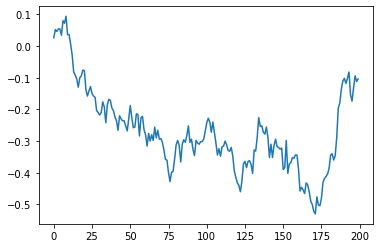

In [23]:
#8. Diffusion using random walk ?????
import numpy as np
import matplotlib.pyplot as plt
import math

a=np.random.randint(0, 2, size=(1000, 200))
print(a.shape)
print("random:", '\n', a, '\n') 

mask=(a==0) 
a[mask]=-1 


wd=a.sum(axis=1)#.reshape(1000,1)
print('walking distances: \n', wd, '\n')

s=np.square(wd)
print('square distances: \n', s, '\n')

ss = np.mean(wd**2, axis=0)

print("mean of the square columns:", s.mean(axis=0))

mean_distance = a.copy() 


for i in range(1,200):
    mean_distance[:,i]=mean_distance [:,i]+mean_distance[:,i-1]
    
mean_distance=mean_distance.mean(axis=0)

timestep= np.arange(200)
plt.plot(timestep, mean_distance)